In [7]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Boston_poverty.csv')

In [8]:
df.head()

,Label (Grouping),Massachusetts!!Estimate,Massachusetts!!Margin of Error,Massachusetts!!Percent,Massachusetts!!Percent Margin of Error,"Boston city, Massachusetts!!Estimate","Boston city, Massachusetts!!Margin of Error","Boston city, Massachusetts!!Percent","Boston city, Massachusetts!!Percent Margin of Error"
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 16 years and over,"5,790,261","±4,144","5,790,261",(X),"564,064","±3,771","564,064",(X)
2,In labor force,"3,865,417","±20,138",66.8%,±0.4,"390,707","±6,317",69.3%,±1.1
3,Civilian labor force,"3,859,910","±20,214",66.7%,±0.4,"390,287","±6,316",69.2%,±1.1
4,Employed,"3,604,672","±22,861",62.3%,±0.4,"358,975","±6,721",63.6%,±1.1


In [9]:
below_10k_estimate = int(''.join(filter(str.isdigit, df.loc[57]['Boston city, Massachusetts!!Estimate'])))
below_10k_error = int(''.join(filter(str.isdigit, df.loc[57]['Boston city, Massachusetts!!Margin of Error'])))

_10k_15k_estimate = int(''.join(filter(str.isdigit, df.loc[58]['Boston city, Massachusetts!!Estimate'])))
_10k_15k_error = int(''.join(filter(str.isdigit, df.loc[58]['Boston city, Massachusetts!!Margin of Error'])))

total_estimate = below_10k_estimate + _10k_15k_estimate
total_error = below_10k_error + _10k_15k_error

print('Distribution is normal with a peak at', total_estimate)
print('Lower bound:', total_estimate - total_error)
print('Mean:', total_estimate)
print('Upper bound:', total_estimate + total_error)



Distribution is normal with a peak at 42699
Lower bound: 37595
Mean: 42699
Upper bound: 47803


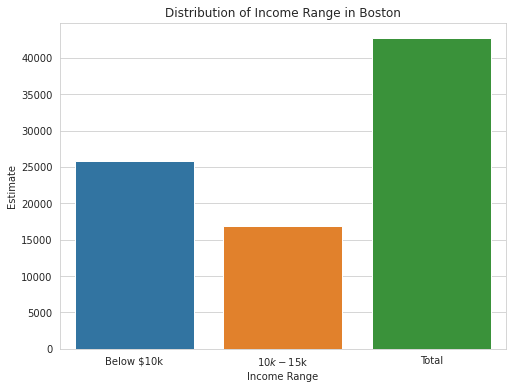

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

below_10k_estimate = int(''.join(filter(str.isdigit, df.loc[57]['Boston city, Massachusetts!!Estimate'])))
_10k_15k_estimate = int(''.join(filter(str.isdigit, df.loc[58]['Boston city, Massachusetts!!Estimate'])))

total_estimate = below_10k_estimate + _10k_15k_estimate

x = ['Below $10k', '$10k - $15k', 'Total']

y = [below_10k_estimate, _10k_15k_estimate, total_estimate]

sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=x, y=y)
plt.title('Distribution of Income Range in Boston')
plt.xlabel('Income Range')
plt.ylabel('Estimate')
plt.show()
